In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('display.max_rows',300)
pd.set_option('display.max_column',20)

In [2]:
dataset = pd.read_csv("data/dataset_with_features.csv")
print("dataset shape",dataset.shape)
dataset.head(5)

dataset shape (123, 22)


,PeLEDs component,PA,IsomericSMILES,A_site,Conc(mg/ml),Control device EQE,Passivated device EQE,EQE enhanced ratio,Heavy_atoms,H_Acceptors,...,Val_electrons,Mol_Wt,Topo,TPSA,AvgIpc,Carbon,Hydrogen,Oxide,Nitrogen,Halide
0,PPA2FAn–1PbnBr3n+1,trimorpholinophosphine oxide,C1COCCN1P(=O)(N2CCOCC2)N3CCOCC3,0.0,2.000,2.79%,4.40%,1.5771,20,4,...,116,305.315,1027.262645,54.48,2.663596,12,24,4,3,0
1,PPA2FAn–1PbnBr3n+1,trimorpholinophosphine oxide,C1COCCN1P(=O)(N2CCOCC2)N3CCOCC3,0.0,4.000,2.79%,7.31%,2.6201,20,4,...,116,305.315,1027.262645,54.48,2.663596,12,24,4,3,0
2,PPA2FAn–1PbnBr3n+1,trimorpholinophosphine oxide,C1COCCN1P(=O)(N2CCOCC2)N3CCOCC3,0.0,6.000,2.79%,5.85%,2.0968,20,4,...,116,305.315,1027.262645,54.48,2.663596,12,24,4,3,0
3,CsPbBr3,Lithium bromide,[Li+].[Br-],1.0,1.738,2.83%,7.92%,2.7986,2,0,...,8,86.845,2.000000,0.00,0.000000,0,0,0,0,1
4,PEA2PbBr4(CsPbBr3)4,ethoxylated trimethylolpropane triacrylate,CCC(COCCOC(=O)C=C)(COCCOC(=O)C=C)COCCOC(=O)C=C,1.0,5.000,16.79%,22.49%,1.3395,30,9,...,170,428.478,1614.338425,106.59,2.991211,21,32,9,0,0


In [3]:
#Features

X_origin = dataset.iloc[:,[3,4] + list(range(8,dataset.shape[1]))]
#filling with mean concentration
mean_concen= X_origin['Conc(mg/ml)'].mean()
X_origin.iloc[:,1:2] = X_origin['Conc(mg/ml)'].fillna(mean_concen)
print("X_origin shape:",X_origin.shape)
X_origin.head()

X_origin shape: (123, 16)


,A_site,Conc(mg/ml),Heavy_atoms,H_Acceptors,H_Donors,Rot_bonds,Val_electrons,Mol_Wt,Topo,TPSA,AvgIpc,Carbon,Hydrogen,Oxide,Nitrogen,Halide
0,0.0,2.000,20,4,0,3,116,305.315,1027.262645,54.48,2.663596,12,24,4,3,0
1,0.0,4.000,20,4,0,3,116,305.315,1027.262645,54.48,2.663596,12,24,4,3,0
2,0.0,6.000,20,4,0,3,116,305.315,1027.262645,54.48,2.663596,12,24,4,3,0
3,1.0,1.738,2,0,0,0,8,86.845,2.000000,0.00,0.000000,0,0,0,0,1
4,1.0,5.000,30,9,0,20,170,428.478,1614.338425,106.59,2.991211,21,32,9,0,0


In [4]:
#Targets
y_origin = dataset['EQE enhanced ratio']
y_origin = pd.DataFrame(y_origin)
y_origin.shape

(123, 1)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
import numpy as np

colors_gradient = ['#56698F', '#ECDCD0', '#A02C2C']
cmap_gradient = LinearSegmentedColormap.from_list('gradient', colors_gradient)



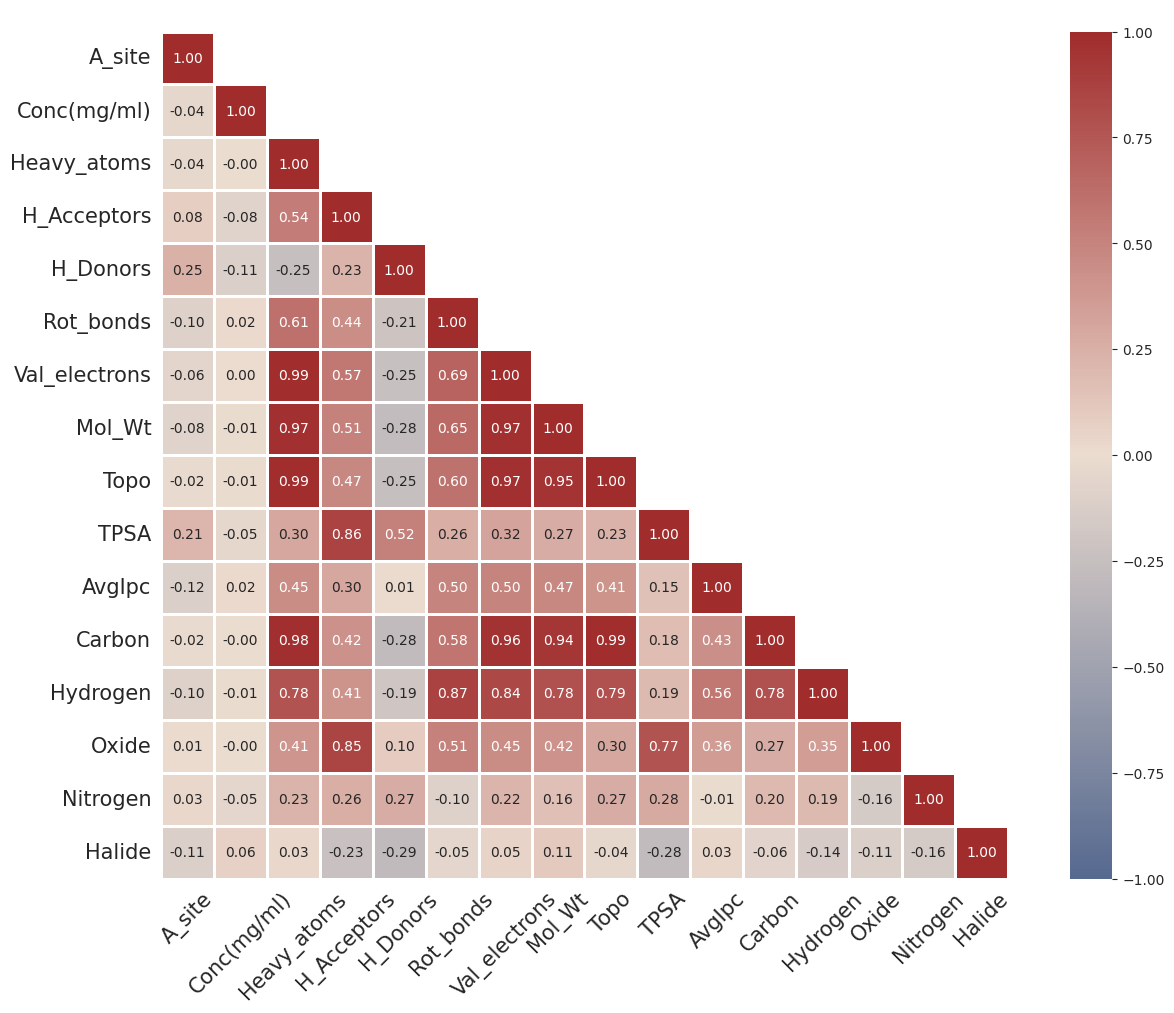

In [6]:
#Initial pearson heatmap

from matplotlib.colors import  LinearSegmentedColormap
corr = X_origin.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
plt.rcParams['font.family']="Arial"
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16,11))
    ax = sns.heatmap(corr, annot=True,annot_kws={"size":10},fmt=".2f",
                     cmap=cmap_gradient,linewidths=2,vmin=-1,vmax=1,mask=mask, square=True)
    ax.tick_params(axis='y', labelsize= 15) 
    ax.tick_params(axis='x', labelsize= 15,rotation = 45)  
 
plt.title(" ")
plt.savefig("output_figures/Initial_peason_corr.png",dpi = 600)
plt.show() 

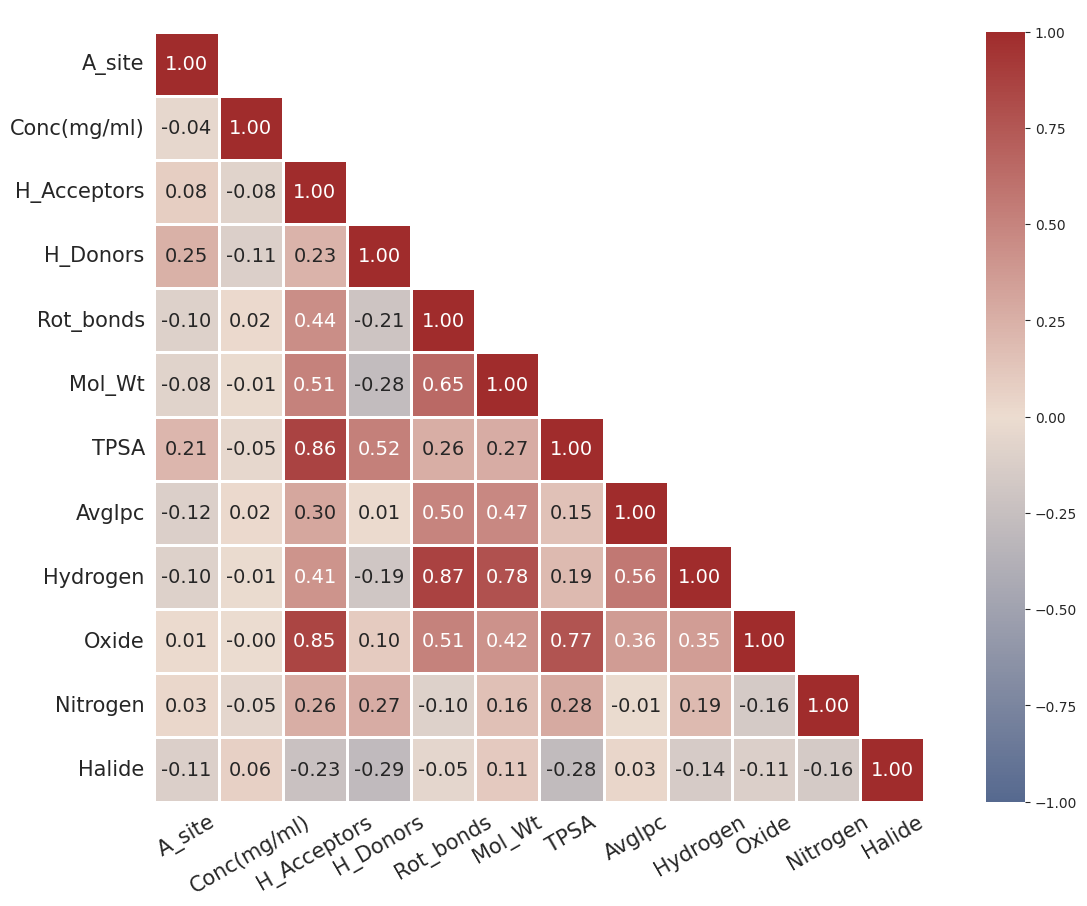

In [7]:
#remove hight correlation features : Heavy_atoms/Carbon/Valence_electrons/Topo
X_origin_proc = X_origin.drop(['Heavy_atoms','Carbon','Val_electrons','Topo'],axis=1)

corr = X_origin_proc.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
plt.rcParams['font.family']="Arial"
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16,10))
    ax = sns.heatmap(corr, annot=True,annot_kws={"size": 14},fmt=".2f",
                     cmap=cmap_gradient,linewidths= 2,vmin=-1,vmax=1,mask=mask, square=True)
    ax.tick_params(axis='y', labelsize=15) 
    ax.tick_params(axis='x', labelsize=15,rotation = 30)  
    
plt.title(" ")
plt.savefig("output_figures/pocessed_peason_corr.png",dpi = 600)
plt.show()  

In [8]:
print("X_origin_proc shape:",X_origin_proc.shape)
print("y_origin shape:",y_origin.shape)

X_origin_proc shape: (123, 12)
y_origin shape: (123, 1)


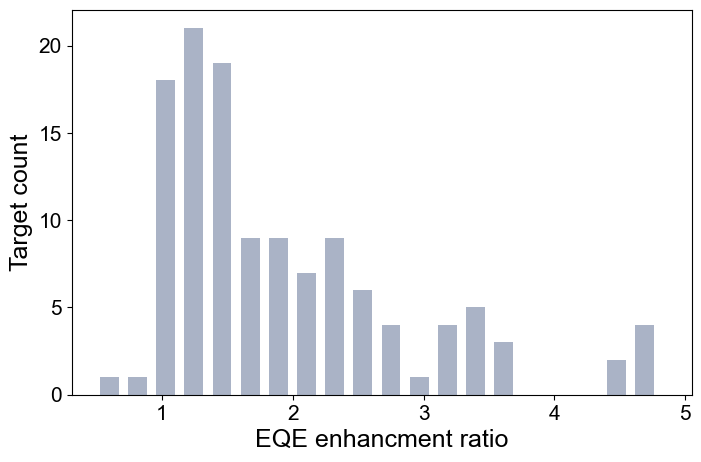

In [9]:
#Target distribution
fig, ax = plt.subplots(figsize =(8,5))
width_size = (np.max(y_origin) - np.min(y_origin))/30
ax.hist(y_origin, width = width_size, bins = 20, color= '#56698F',alpha = 0.5)
locator_x = ticker.MultipleLocator(base=1) 
locator_y = ticker.MultipleLocator(base=5) 
ax.xaxis.set_major_locator(locator_x)
ax.yaxis.set_major_locator(locator_y)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.ylabel('Target count', fontsize = 18)
plt.xlabel('EQE enhancment ratio', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.ylim()
plt.savefig("output_figures/target_dis.png",dpi = 600)
plt.show()

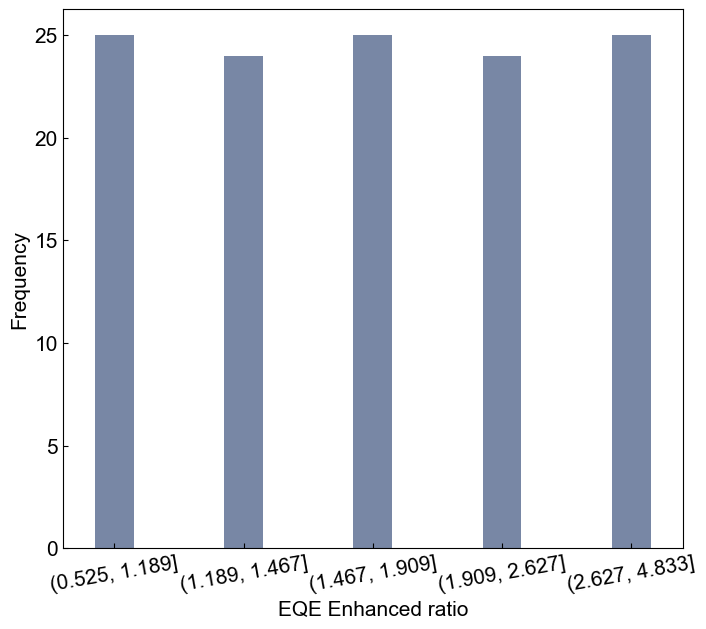

In [10]:
#acculating statistics
n_bins = 5
y_bins = pd.qcut(y_origin.values.ravel(), n_bins)
quantile_counts = y_bins.value_counts()
quantile_counts.plot(kind='bar',width = 0.3, color='#56698F',alpha = 0.8,figsize =(8,7))

plt.xlabel('EQE Enhanced ratio',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.xticks(fontsize = 15,rotation= 10)
plt.yticks(fontsize = 15)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.savefig("output_figures/qualtiles.png",dpi = 600)
plt.show()

In [11]:

#Uniform sampling based on quintile-based statistical analysis 
from sklearn.model_selection import train_test_split
X_features, X_independent_test, y_target, y_independent_test = train_test_split(X_origin_proc, y_origin.values.ravel(),stratify = y_bins, test_size= 0.1,random_state = 42)
X_features.to_csv("data/X_features.csv",index= False)

y_target = pd.DataFrame(y_target,columns=y_origin.columns)
y_target.to_csv("data/y_target.csv",index = False)

#independet test set (never into models before testing)
X_independent_test.to_csv("data/X_independent_test.csv",index= False)
y_independent_test = pd.DataFrame(y_independent_test,columns=y_origin.columns)
y_independent_test.to_csv("data/y_independent_test.csv",index = False)